## Linear Classifiers
In this assignment, we will load a dataset and train a logistic regression classifier.

## The dataset
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals (the `name` column). The main aim of the data is to discriminate healthy people from those with PD, according to the `status` column, which is set to `0` for healthy and `1` for PD.



## 1 Import necessary packages

We will import the following packages

- pandas
- train_test_split
- LogisticRegression
- pyplot from matplotlib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 2. Load and prepare the dataset

1. Load the dataset into a DataFrame named `df_data`.
2. Drop the `name` column. This column is not a feature required by the model.
3. Create a DataFrame named `X` containing all the columns except the status.
4. Create a DataFrame named `y` containing the status.

In [14]:
df_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/parkinsons.data')
df_data = df_data.drop(['name'], axis=1)
X = df_data.drop(['status'], axis=1)
y = df_data['status']

## 3. Split the dataset into a training set and a test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## 4. Create the model

1. Instantiate a logistic regression classifier with an lbfgs solver and penalty set to none.
2. Fit the classifier to the data.


In [20]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=1000, penalty='none')

### 5. Calculate accuracy

Calculate and print the accuracy of the model on the test data.

In [24]:
print('Accuracy of Logistic Regression without regularization: %s' % lr.score(X_test, y_test))
print('Number of iterations %s' % lr.n_iter_[0])

Accuracy of Logistic Regression without regularization: 0.8979591836734694
Number of iterations 503


### 6. L2 regularization

Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [25]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
lr_regularized.fit(X_train, y_train)
print('Accuracy of Logistic Regression with regularization: %s' % lr_regularized.score(X_test, y_test))
print('Number of iterations %s' % lr_regularized.n_iter_[0])

Accuracy of Logistic Regression with regularization: 0.9183673469387755
Number of iterations 216


Our model clearly performs better with L2 regularization.

## 7. Choose the `C` parameter

Use a loop to test the effect of varying the `C` parameter from `0.05` to `1.5` in increments of `0.05`. Plot a graph to show the accuracy of the test data versus the accuracy of the training data. Select an appropriate value for `C` and explain why that may be the best value.

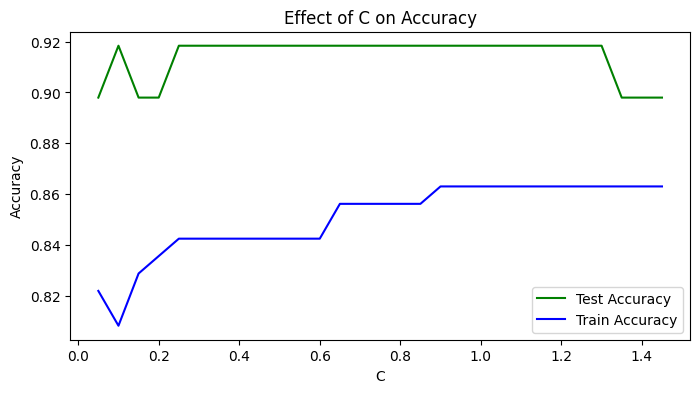

In [27]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

From the graph above the best value for `C` occurs between `1.3` and `1.5`. This region minimizes the difference between the test and training accuracy implying the least amount of overfitting is occuring.